In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('imbd_cleaned.csv')
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,short,0.0,0,0,7,2.833213,['US'],"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.0,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,short,0.0,0,0,6,0.693147,['FR'],"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.0,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,short,0.0,0,0,5,0.000000,['US'],Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.0,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,short,0.0,0,0,6,3.044522,['US'],"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.0,0.693147,['silent'],0.0
4,Autour d'une cabine,"(6, 7]",1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,short,0.0,0,0,6,2.197225,['FR'],"Animation,Short",0.000000,0.000000,6.1,"['\\N', 'ES', 'US', 'FR', 'HU', 'RU', 'UA']",1.386294,0.0,0.693147,['silent'],0.0


In [3]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Movies',
    'tvMovie': 'Movies',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'TV Series',
    'tvMiniSeries': 'TV Series',
    'tvEpisode': 'TV Series',
    'tvSpecial': 'TV Special',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)

In [4]:
# df = pd.read_csv('imbd_log.csv')

# df_class = pd.concat([
#     df.select_dtypes(include=['number']).drop(['averageRating'], axis=1),
#     df[['titleType']]
# ], axis=1)

df_class = pd.concat([
    df.select_dtypes(include=['number']).drop(['averageRating'], axis=1),
    pd.get_dummies(df['titleType'], drop_first=True)
], axis=1)

feature_names = df_class.columns

X = df_class.values

# X = df.select_dtypes(include=['number'])
# X = X.drop(['averageRating'], axis = 1)
# X = X.values
y = np.array(df['rating'])

In [5]:
df_class.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,externalLinks,writerCredits,directorsCredits,quotesTotal,Shorts,TV Series,TV Special,Video,Videogame
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,0,7,2.833213,0.693147,1.386294,2.302585,0.0,0.693147,0.0,True,False,False,False,False
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,0,6,0.693147,0.000000,0.000000,1.386294,0.0,0.693147,0.0,True,False,False,False,False
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,0,5,0.000000,0.000000,0.693147,1.609438,0.0,0.693147,0.0,True,False,False,False,False
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,0,6,3.044522,0.693147,1.945910,1.945910,0.0,0.693147,0.0,True,False,False,False,False
4,1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,0.0,0,0,6,2.197225,0.000000,0.000000,1.386294,0.0,0.693147,0.0,True,False,False,False,False


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf = RandomForestClassifier(n_estimators=300, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.43460123800125594
F1-score [0.33333333 0.21176471 0.07106599 0.10025063 0.1975764  0.33046175
 0.42973037 0.55773583 0.31457825 0.28348348]
              precision    recall  f1-score   support

      (0, 1]       0.60      0.23      0.33        26
      (1, 2]       0.62      0.13      0.21       141
      (2, 3]       0.34      0.04      0.07       353
      (3, 4]       0.35      0.06      0.10      1027
      (4, 5]       0.35      0.14      0.20      2719
      (5, 6]       0.37      0.30      0.33      6372
      (6, 7]       0.40      0.46      0.43     11643
      (7, 8]       0.48      0.67      0.56     14463
      (8, 9]       0.44      0.25      0.31      6563
     (9, 10]       0.61      0.18      0.28      1281

    accuracy                           0.43     44588
   macro avg       0.46      0.25      0.28     44588
weighted avg       0.43      0.43      0.41     44588



In [12]:
classification_report(y_test, y_pred, output_dict=True)

{'(0, 1]': {'precision': 0.6,
  'recall': 0.23076923076923078,
  'f1-score': 0.3333333333333333,
  'support': 26.0},
 '(1, 2]': {'precision': 0.6206896551724138,
  'recall': 0.1276595744680851,
  'f1-score': 0.21176470588235294,
  'support': 141.0},
 '(2, 3]': {'precision': 0.34146341463414637,
  'recall': 0.039660056657223795,
  'f1-score': 0.07106598984771574,
  'support': 353.0},
 '(3, 4]': {'precision': 0.35294117647058826,
  'recall': 0.05842259006815969,
  'f1-score': 0.10025062656641603,
  'support': 1027.0},
 '(4, 5]': {'precision': 0.34818941504178275,
  'recall': 0.13791835233541744,
  'f1-score': 0.1975763962065332,
  'support': 2719.0},
 '(5, 6]': {'precision': 0.3663101604278075,
  'recall': 0.3010043942247332,
  'f1-score': 0.3304617505168849,
  'support': 6372.0},
 '(6, 7]': {'precision': 0.4001333037102866,
  'recall': 0.46405565575882507,
  'f1-score': 0.4297303746122644,
  'support': 11643.0},
 '(7, 8]': {'precision': 0.47613225080700383,
  'recall': 0.673096867869736

In [ ]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4114784246882569
F1-score [0.         0.         0.         0.01712655 0.13206388 0.28765396
 0.38816883 0.55671762 0.12228692 0.12652768]
              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.00      0.00      0.00       353
      (3, 4]       0.38      0.01      0.02      1027
      (4, 5]       0.40      0.08      0.13      2719
      (5, 6]       0.38      0.23      0.29      6372
      (6, 7]       0.38      0.40      0.39     11643
      (7, 8]       0.43      0.79      0.56     14463
      (8, 9]       0.47      0.07      0.12      6563
     (9, 10]       0.80      0.07      0.13      1281

    accuracy                           0.41     44588
   macro avg       0.32      0.17      0.16     44588
weighted avg       0.42      0.41      0.35     44588



c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [14]:
random_search.best_params_

{'min_samples_split': 30, 'min_samples_leaf': 1, 'max_depth': np.int64(17)}

In [ ]:
nodes = []
train_err = []
test_err = []

for max_depth in list(np.arange(1, 20)):
    dt = RandomForestClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_err.append(1 - accuracy_score(y_train, y_train_pred))
    test_err.append(1 - accuracy_score(y_test, y_test_pred))
    nodes.append(dt.tree_.node_count)
    

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(nodes, train_err, label='train')
ax[0].plot(nodes, test_err, label='test')
ax[0].legend()

ax[0].set_xlabel("n.of Nodes", fontsize=16)
ax[0].set_ylabel("Error", fontsize=16)
# ax[0].set_title("n.of Nodes vs Error", fontsize=16)

ax[1].plot(list(np.arange(1, 20)), train_err, label='train')
ax[1].plot(list(np.arange(1, 20)), test_err, label='test')

ax[1].set_xlabel("Depth", fontsize=16)
ax[1].set_ylabel("Error", fontsize=16)
# ax[1].set_title("Depth vs Error", fontsize=16)

plt.tight_layout()
plt.show()

In [15]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"(0, 1]": {"precision": 0.6, "recall": 0.23076923076923078, "f1-score": 0.3333333333333333, "support": 26.0}, "(1, 2]": {"precision": 0.6206896551724138, "recall": 0.1276595744680851, "f1-score": 0.21176470588235294, "support": 141.0}, "(2, 3]": {"precision": 0.34146341463414637, "recall": 0.039660056657223795, "f1-score": 0.07106598984771574, "support": 353.0}, "(3, 4]": {"precision": 0.35294117647058826, "recall": 0.05842259006815969, "f1-score": 0.10025062656641603, "support": 1027.0}, "(4, 5]": {"precision": 0.34818941504178275, "recall": 0.13791835233541744, "f1-score": 0.1975763962065332, "support": 2719.0}, "(5, 6]": {"precision": 0.3663101604278075, "recall": 0.3010043942247332, "f1-score": 0.3304617505168849, "support": 6372.0}, "(6, 7]": {"precision": 0.4001333037102866, "recall": 0.46405565575882507, "f1-score": 0.4297303746122644, "support": 11643.0}, "(7, 8]": {"precision": 0.47613225080700383, "recall": 0.6730968678697365, "f1-score": 0.5577358274370506, "support": 1446

In [16]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'(0, 1]': {'precision': 0.6,
  'recall': 0.23076923076923078,
  'f1-score': 0.3333333333333333,
  'support': 26.0},
 '(1, 2]': {'precision': 0.6206896551724138,
  'recall': 0.1276595744680851,
  'f1-score': 0.21176470588235294,
  'support': 141.0},
 '(2, 3]': {'precision': 0.34146341463414637,
  'recall': 0.039660056657223795,
  'f1-score': 0.07106598984771574,
  'support': 353.0},
 '(3, 4]': {'precision': 0.35294117647058826,
  'recall': 0.05842259006815969,
  'f1-score': 0.10025062656641603,
  'support': 1027.0},
 '(4, 5]': {'precision': 0.34818941504178275,
  'recall': 0.13791835233541744,
  'f1-score': 0.1975763962065332,
  'support': 2719.0},
 '(5, 6]': {'precision': 0.3663101604278075,
  'recall': 0.3010043942247332,
  'f1-score': 0.3304617505168849,
  'support': 6372.0},
 '(6, 7]': {'precision': 0.4001333037102866,
  'recall': 0.46405565575882507,
  'f1-score': 0.4297303746122644,
  'support': 11643.0},
 '(7, 8]': {'precision': 0.47613225080700383,
  'recall': 0.673096867869736

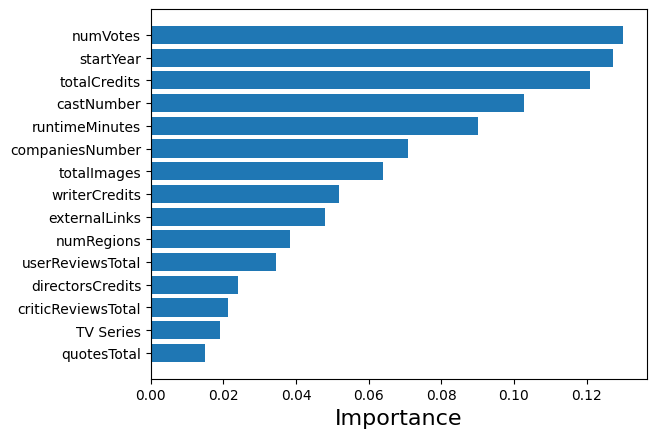

In [ ]:
# Questo pezzo di codice visualizza le 15 feature più importanti usate dal modello Random Forest addestrato (clf)
# in base alla Mean Decrease in Impurity (MDI), ovvero alla riduzione media dell’impurità (Gini Index/Entropy) 
# che ogni feature contribuisce a ottenere negli split degli alberi.

nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]  # le 15 più importanti

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.xlabel("Importance (MDI)", fontsize=16)
# plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [13]:
from sklearn.tree import plot_tree

In [19]:
clf.estimators_[0]  

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

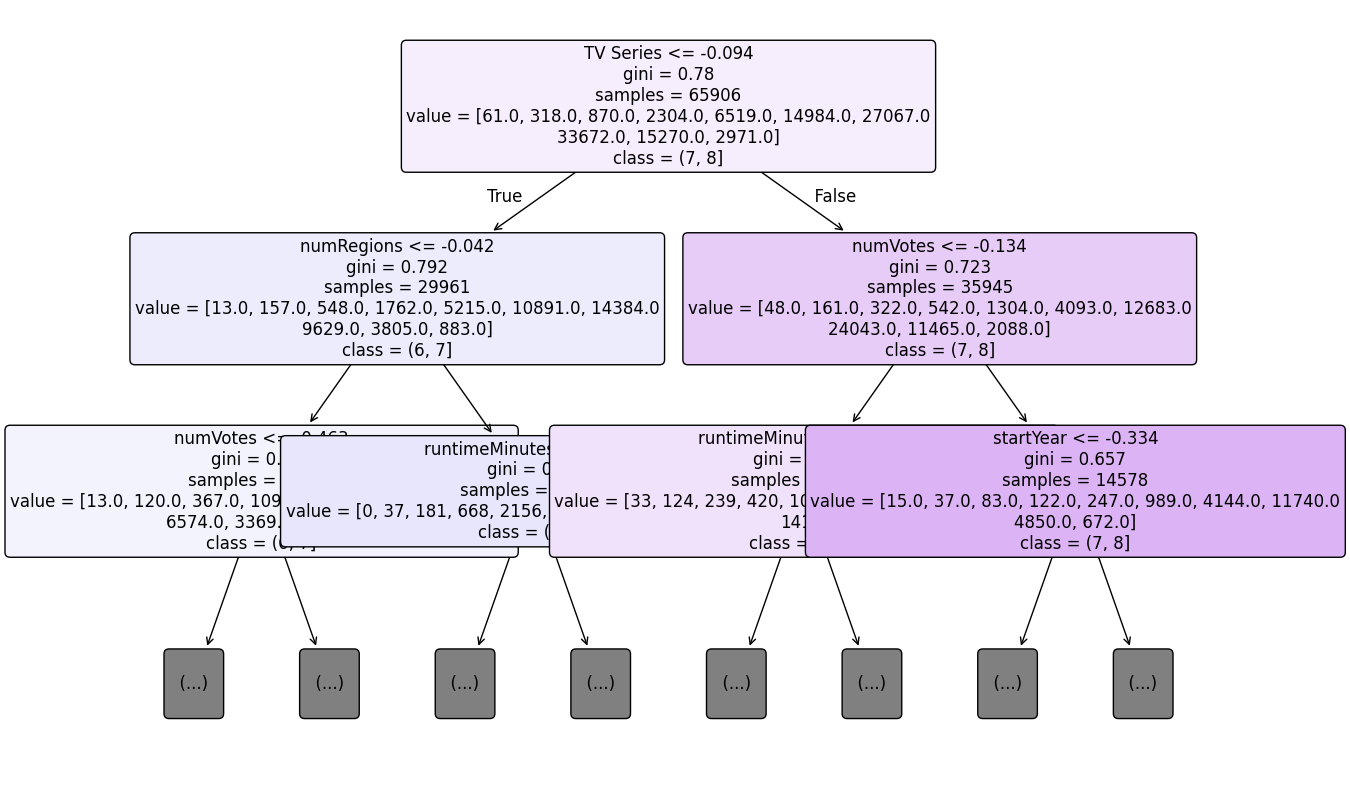

In [14]:
plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[0], 
          feature_names=feature_names, 
          class_names=['(0, 1]', '(1, 2]', '(2, 3]', '(3, 4]', '(4, 5]', '(5, 6]', '(6, 7]', '(7, 8]', '(8, 9]', '(9, 10]'],
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [15]:
from sklearn.inspection import permutation_importance

In [16]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

C:\Users\Tommaso\AppData\Local\Temp\ipykernel_16168\322976986.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])


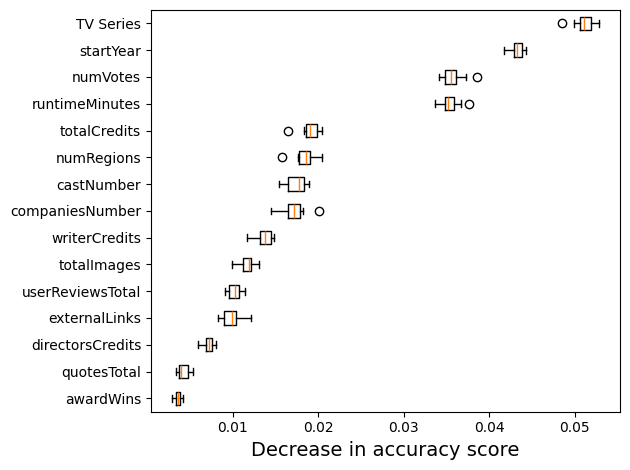

In [23]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
# plt.title("Permutation Importances (test set)")
plt.xlabel("Decrease in accuracy score", fontsize=14)
plt.tight_layout()
plt.show()

Feature da titleType identificate: ['Shorts', 'TV Series', 'TV Special', 'Video', 'Videogame']

=== MDI AGGREGATO ===


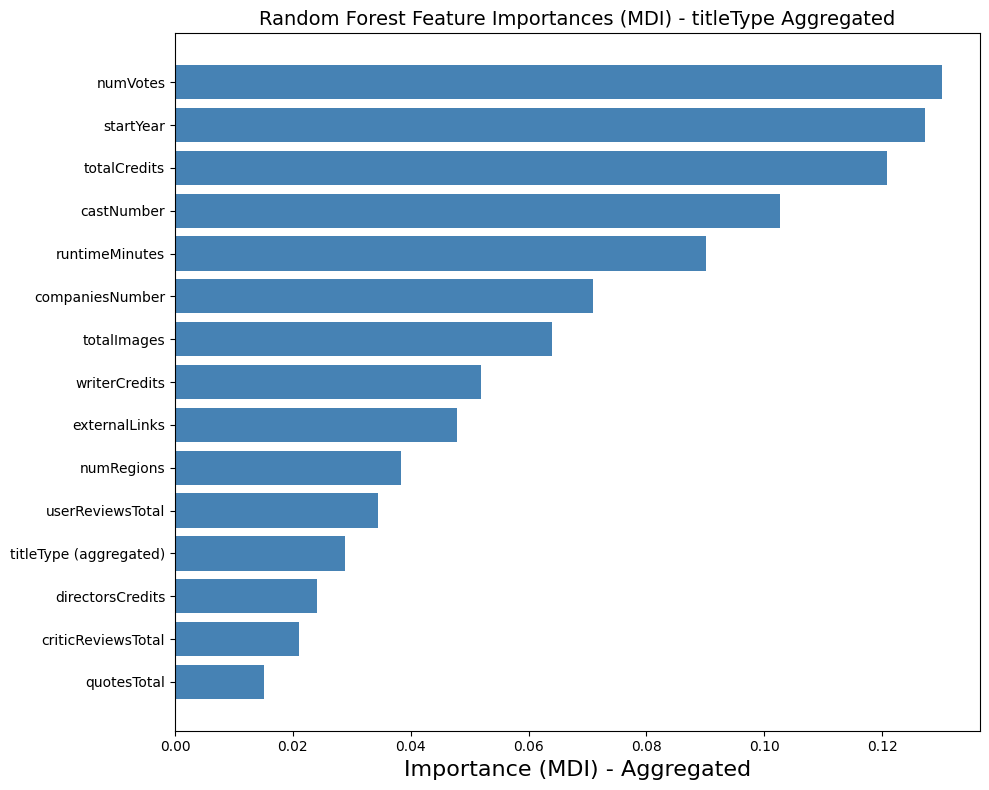

Top 10 feature MDI aggregato:
 1. numVotes                       0.1301
 2. startYear                      0.1273
 3. totalCredits                   0.1209
 4. castNumber                     0.1027
 5. runtimeMinutes                 0.0901
 6. companiesNumber                0.0709
 7. totalImages                    0.0641
 8. writerCredits                  0.0519
 9. externalLinks                  0.0479
10. numRegions                     0.0383

=== PERMUTATION IMPORTANCE AGGREGATO ===


C:\Users\Tommaso\AppData\Local\Temp\ipykernel_16168\4111166387.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(aggregated_perm_all[sorted_idx_perm].T, vert=False,


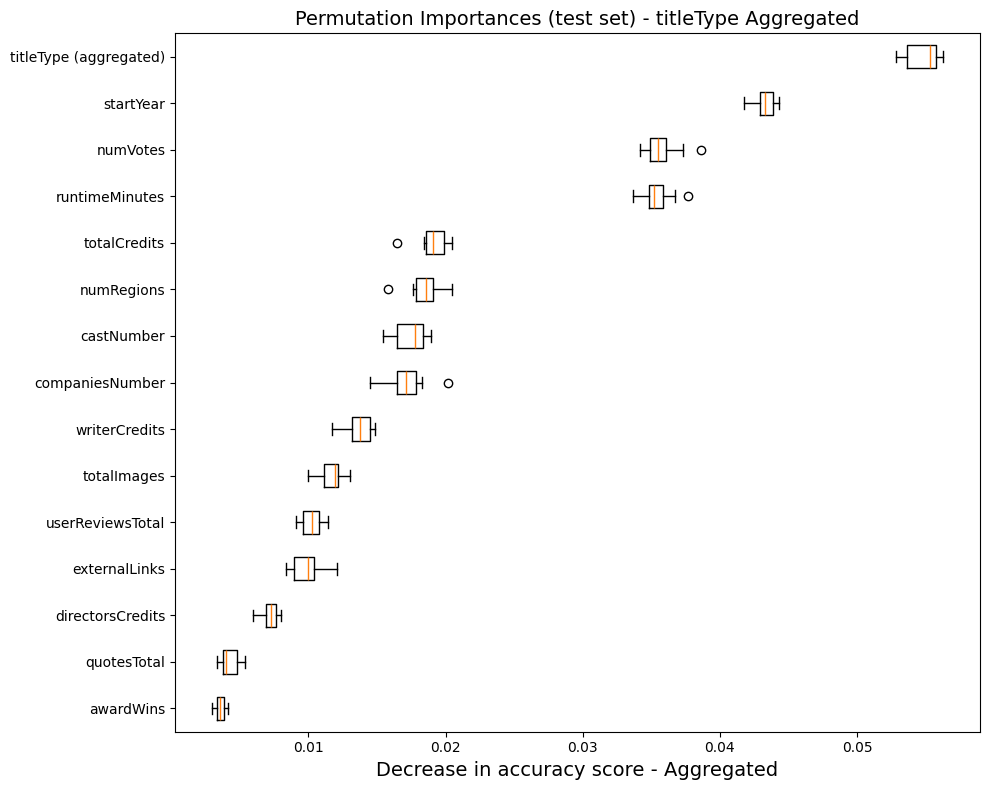

Top 10 feature Permutation Importance aggregato:
 1. titleType (aggregated)         0.0548 ± 0.0013
 2. startYear                      0.0433 ± 0.0007
 3. numVotes                       0.0357 ± 0.0013
 4. runtimeMinutes                 0.0353 ± 0.0012
 5. totalCredits                   0.0191 ± 0.0011
 6. numRegions                     0.0184 ± 0.0012
 7. castNumber                     0.0174 ± 0.0011
 8. companiesNumber                0.0172 ± 0.0014
 9. writerCredits                  0.0137 ± 0.0010
10. totalImages                    0.0116 ± 0.0009

CONFRONTO: IMPORTANZA TITLETYPE
titleType - MDI Aggregato:           0.0289
titleType - Permutation Aggregato:   0.0548 ± 0.0013
Ranking MDI:        12° su 20 feature
Ranking Permutation: 1° su 20 feature


In [24]:
# Cella da aggiungere dopo il tuo codice esistente
# Aggregazione delle importanze per le variabili categoriche one-hot encoded

# Identifica le feature che derivano dal one-hot encoding di titleType
titletype_features = [col for col in feature_names if col.startswith('Movies') or 
                     col.startswith('Shorts') or col.startswith('TV Series') or 
                     col.startswith('TV Special') or col.startswith('Video') or 
                     col.startswith('Videogame')]

print("Feature da titleType identificate:", titletype_features)

# Crea una versione aggregata delle feature importances
def aggregate_categorical_importance(importances, feature_names, categorical_features, categorical_name):
    """
    Aggrega le importances delle dummy variables di una stessa categoria
    """
    # Copia le importances originali
    aggregated_importances = importances.copy()
    aggregated_names = list(feature_names)
    
    # Trova gli indici das rimuovere e l'importanza aggregata
    indices_to_remove = []
    aggregated_importance = 0
    
    for i, fname in enumerate(feature_names):
        if fname in categorical_features:
            aggregated_importance += importances[i]
            indices_to_remove.append(i)
    
    # Rimuovi le feature individuali (in ordine inverso per non sballare gli indici)
    for idx in sorted(indices_to_remove, reverse=True):
        aggregated_importances = np.delete(aggregated_importances, idx)
        aggregated_names.pop(idx)
    
    # Aggiungi l'importanza aggregata
    aggregated_importances = np.append(aggregated_importances, aggregated_importance)
    aggregated_names.append(categorical_name)
    
    return aggregated_importances, aggregated_names

# ===== GRAFICO MDI AGGREGATO =====
print("\n=== MDI AGGREGATO ===")
aggregated_mdi, aggregated_feature_names = aggregate_categorical_importance(
    tree_feature_importances, feature_names, titletype_features, 'titleType (aggregated)'
)

# Plot MDI aggregato
nbr_features = 15
sorted_idx_agg = aggregated_mdi.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx_agg))

fig, ax = plt.subplots(figsize=(10, 8))
plt.barh(y_ticks, aggregated_mdi[sorted_idx_agg], color='steelblue')
plt.yticks(y_ticks, [aggregated_feature_names[i] for i in sorted_idx_agg])
plt.xlabel("Importance (MDI) - Aggregated", fontsize=16)
plt.title("Random Forest Feature Importances (MDI) - titleType Aggregated", fontsize=14)
plt.tight_layout()
plt.show()

# Stampa i valori per confronto
print("Top 10 feature MDI aggregato:")
top_indices = aggregated_mdi.argsort()[-10:][::-1]
for i, idx in enumerate(top_indices):
    print(f"{i+1:2d}. {aggregated_feature_names[idx]:<30} {aggregated_mdi[idx]:.4f}")

# ===== PERMUTATION IMPORTANCE AGGREGATO =====
print("\n=== PERMUTATION IMPORTANCE AGGREGATO ===")

# NOTA: Non ricalcoliamo la permutation importance, usiamo i risultati già presenti in 'result'
# Aggreghiamo solo matematicamente i valori delle dummy variables di titleType
# Per la permutation importance, dobbiamo aggregare i risultati in modo diverso
# Calcoliamo l'importanza aggregata come somma delle importances individuali
titletype_indices = [i for i, fname in enumerate(feature_names) if fname in titletype_features]

# Aggregazione per permutation importance
aggregated_perm_mean = result.importances_mean.copy()
aggregated_perm_std = result.importances_std.copy()
aggregated_perm_all = result.importances.copy()
aggregated_perm_names = list(feature_names)

# Calcola importanza aggregata per titleType
if titletype_indices:
    # Somma le importances delle dummy variables
    titletype_agg_mean = np.sum(result.importances_mean[titletype_indices])
    titletype_agg_std = np.sqrt(np.sum(result.importances_std[titletype_indices]**2))  # Error propagation
    titletype_agg_all = np.sum(result.importances[titletype_indices], axis=0)
    
    # Rimuovi le feature individuali (in ordine inverso)
    for idx in sorted(titletype_indices, reverse=True):
        aggregated_perm_mean = np.delete(aggregated_perm_mean, idx)
        aggregated_perm_std = np.delete(aggregated_perm_std, idx)
        aggregated_perm_all = np.delete(aggregated_perm_all, idx, axis=0)
        aggregated_perm_names.pop(idx)
    
    # Aggiungi l'importanza aggregata
    aggregated_perm_mean = np.append(aggregated_perm_mean, titletype_agg_mean)
    aggregated_perm_std = np.append(aggregated_perm_std, titletype_agg_std)
    aggregated_perm_all = np.vstack([aggregated_perm_all, titletype_agg_all])
    aggregated_perm_names.append('titleType (aggregated)')

# Plot Permutation Importance aggregato
sorted_idx_perm = aggregated_perm_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots(figsize=(10, 8))
plt.boxplot(aggregated_perm_all[sorted_idx_perm].T, vert=False, 
           labels=[aggregated_perm_names[i] for i in sorted_idx_perm])
plt.xlabel("Decrease in accuracy score - Aggregated", fontsize=14)
plt.title("Permutation Importances (test set) - titleType Aggregated", fontsize=14)
plt.tight_layout()
plt.show()

# Stampa i valori per confronto
print("Top 10 feature Permutation Importance aggregato:")
top_indices_perm = aggregated_perm_mean.argsort()[-10:][::-1]
for i, idx in enumerate(top_indices_perm):
    print(f"{i+1:2d}. {aggregated_perm_names[idx]:<30} {aggregated_perm_mean[idx]:.4f} ± {aggregated_perm_std[idx]:.4f}")

# ===== CONFRONTO DIRETTO =====
print("\n" + "="*80)
print("CONFRONTO: IMPORTANZA TITLETYPE")
print("="*80)

# Trova l'importanza di titleType aggregata in entrambi i metodi
try:
    titletype_mdi_idx = aggregated_feature_names.index('titleType (aggregated)')
    titletype_perm_idx = aggregated_perm_names.index('titleType (aggregated)')
    
    print(f"titleType - MDI Aggregato:           {aggregated_mdi[titletype_mdi_idx]:.4f}")
    print(f"titleType - Permutation Aggregato:   {aggregated_perm_mean[titletype_perm_idx]:.4f} ± {aggregated_perm_std[titletype_perm_idx]:.4f}")
    
    # Ranking
    mdi_rank = len(aggregated_mdi) - np.where(aggregated_mdi.argsort() == titletype_mdi_idx)[0][0]
    perm_rank = len(aggregated_perm_mean) - np.where(aggregated_perm_mean.argsort() == titletype_perm_idx)[0][0]
    
    print(f"Ranking MDI:        {mdi_rank}° su {len(aggregated_feature_names)} feature")
    print(f"Ranking Permutation: {perm_rank}° su {len(aggregated_perm_names)} feature")
    
except ValueError:
    print("Errore nel trovare titleType aggregata")

print("="*80)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators=15, OOB Score=0.3675
n_estimators=50, OOB Score=0.4124
n_estimators=100, OOB Score=0.4263
n_estimators=200, OOB Score=0.4330
n_estimators=300, OOB Score=0.4354
n_estimators=500, OOB Score=0.4373
n_estimators=600, OOB Score=0.4383
n_estimators=700, OOB Score=0.4382
n_estimators=800, OOB Score=0.4387
n_estimators=900, OOB Score=0.4387
n_estimators=1000, OOB Score=0.4404


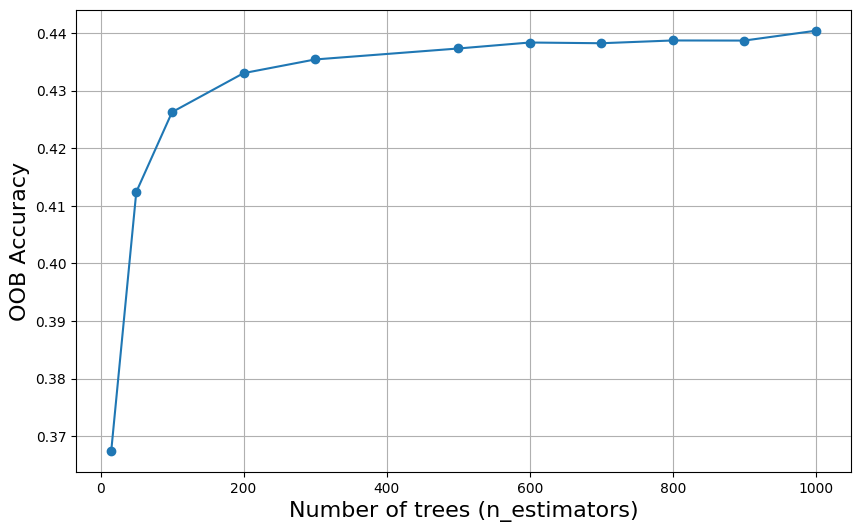

In [26]:
# Parametri da testare
n_estimators_list = [15, 50, 100, 200, 300, 500, 600, 700, 800, 900, 1000]
oob_scores = []

# Addestramento e calcolo OOB
for n in n_estimators_list:
    clf1 = RandomForestClassifier(n_estimators=n, oob_score=True, bootstrap=True, random_state=42, n_jobs=-1)
    clf1.fit(X_train, y_train)
    oob_scores.append(clf1.oob_score_)
    print(f'n_estimators={n}, OOB Score={clf1.oob_score_:.4f}')

# Plot dell'andamento dell’OOB score
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, oob_scores, marker='o')
plt.xlabel('Number of trees (n_estimators)', fontsize=16)
plt.ylabel('OOB Accuracy', fontsize=16)
# plt.title('OOB Score vs Number of Trees')
plt.grid(True)
plt.show()

In [25]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred_proba[0:10]

array([[0.        , 0.00333333, 0.        , 0.01      , 0.02333333,
        0.03333333, 0.12      , 0.28666667, 0.39333333, 0.13      ],
       [0.        , 0.        , 0.01      , 0.01      , 0.065     ,
        0.11833333, 0.2       , 0.36333333, 0.21      , 0.02333333],
       [0.00333333, 0.00333333, 0.        , 0.01      , 0.03333333,
        0.05      , 0.24333333, 0.53333333, 0.12333333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00666667,
        0.        , 0.07      , 0.19666667, 0.72333333, 0.00333333],
       [0.01      , 0.00333333, 0.        , 0.00666667, 0.08      ,
        0.12333333, 0.28666667, 0.28      , 0.16      , 0.05      ],
       [0.00333333, 0.        , 0.00666667, 0.00333333, 0.01777778,
        0.05222222, 0.08333333, 0.64      , 0.10027778, 0.09305556],
       [0.        , 0.00333333, 0.00333333, 0.01333333, 0.02      ,
        0.02666667, 0.40333333, 0.37      , 0.15      , 0.01      ],
       [0.        , 0.00333333, 0.0133333

In [26]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [27]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(44588, 10))

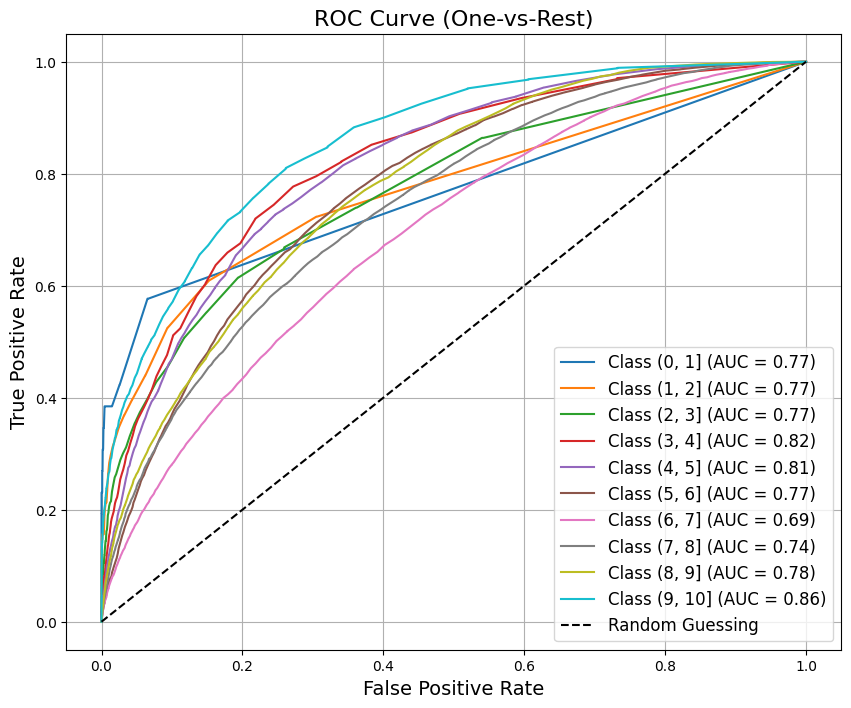

In [28]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve (One-vs-Rest)", fontsize = 16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()


In [29]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.7788508298265269)

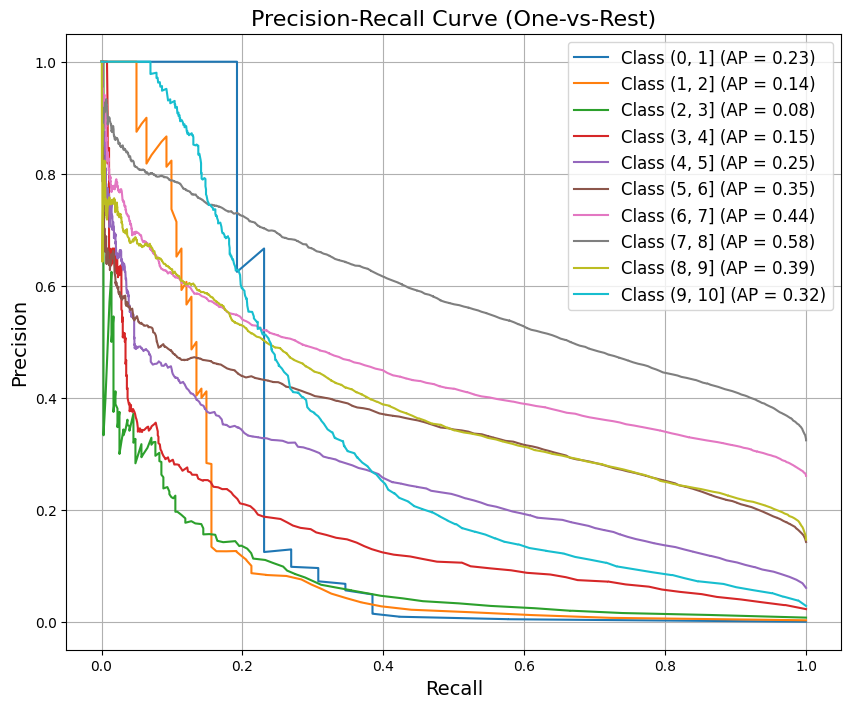

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

# Boosting

In [31]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [32]:
clf = AdaBoostClassifier(estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3641787027899883
F1-score [0.         0.         0.         0.         0.02228412 0.12616993
 0.35028822 0.53009776 0.04725693 0.        ]
              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.00      0.00      0.00       353
      (3, 4]       0.00      0.00      0.00      1027
      (4, 5]       0.21      0.01      0.02      2719
      (5, 6]       0.28      0.08      0.13      6372
      (6, 7]       0.30      0.41      0.35     11643
      (7, 8]       0.41      0.74      0.53     14463
      (8, 9]       0.22      0.03      0.05      6563
     (9, 10]       0.00      0.00      0.00      1281

    accuracy                           0.36     44588
   macro avg       0.14      0.13      0.11     44588
weighted avg       0.30      0.36      0.29     44588



c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [33]:
# clf = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100), n_estimators=10, random_state=0)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))